# Statistics
## Banking - Predicting a Loan Outcome

In [29]:
import pandas as pd
import numpy as np

DATA_SOURCE = 'data/'

# Read in the data
accounts = pd.read_csv(DATA_SOURCE + 'account.csv', sep=';')
cards = pd.read_csv(DATA_SOURCE + 'card_dev.csv', sep=';')
clients = pd.read_csv(DATA_SOURCE + 'client.csv', sep=';')
dispositions = pd.read_csv(DATA_SOURCE + 'disp.csv', sep=';')
districts = pd.read_csv(DATA_SOURCE + 'district.csv', sep=';')
loans = pd.read_csv(DATA_SOURCE + 'loan_dev.csv', sep=';')
transactions = pd.read_csv(DATA_SOURCE + 'trans_dev.csv', sep=';')

C:\Users\joaoj\AppData\Local\Temp\ipykernel_20928\1632344289.py:13: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(DATA_SOURCE + 'trans_dev.csv', sep=';')


#### Plots the frequency by the number of account disponents in dispositions

AxesSubplot(0.125,0.11;0.775x0.77)


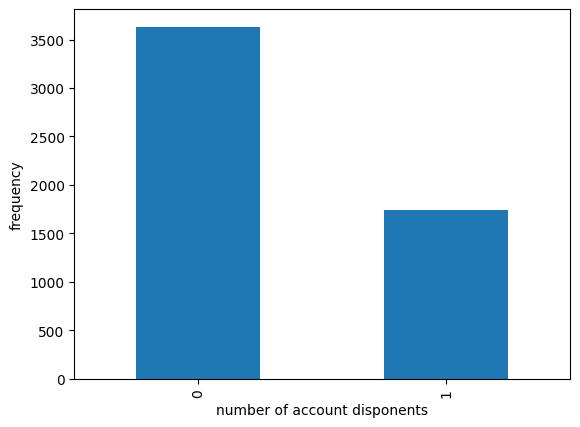

In [30]:
from src.preprocess.dispositions import preprocess_dispositions
dispositions = preprocess_dispositions(dispositions) # retrieved from 'processing dispositions'

print(dispositions["number_account_disponents"].value_counts().plot(kind='bar', xlabel='number of account disponents', ylabel='frequency'))